In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.dataloader import *
from fastai.dataset import *
from fastai.transforms import *
from fastai.models import *
from fastai.conv_learner import *

In [3]:
DIR = Path('data/imagenet/')
TRAIN_CSV='train.csv'

In [4]:
from pathlib import Path

# Load ImageNet sample and format data

In [1]:
!wget --header="Host: files.fast.ai" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/65.0.3325.146 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" "http://files.fast.ai/data/imagenet-sample-train.tar.gz" -O "imagenet-sample-train.tar.gz" -c

--2018-03-27 21:56:49--  http://files.fast.ai/data/imagenet-sample-train.tar.gz
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2232645974 (2.1G) [application/x-tar]
Saving to: ‘imagenet-sample-train.tar.gz’

imagenet-sample-tra 100%[===================>]   2.08G  11.5MB/s    in 3m 39s  

2018-03-27 22:00:29 (9.73 MB/s) - ‘imagenet-sample-train.tar.gz’ saved [2232645974/2232645974]



In [2]:
!mkdir data/imagenet

In [2]:
!tar -xzf imagenet-sample-train.tar.gz -C data/imagenet

In [8]:
ls data/imagenet/train/n01558993

n01558993_10823.JPEG  n01558993_15546.JPEG  n01558993_4047.JPEG
n01558993_11309.JPEG  n01558993_2105.JPEG   n01558993_6724.JPEG
n01558993_12613.JPEG  n01558993_2202.JPEG   n01558993_69.JPEG
n01558993_12850.JPEG  n01558993_2407.JPEG   n01558993_7091.JPEG
n01558993_13169.JPEG  n01558993_2718.JPEG   n01558993_8824.JPEG
n01558993_13686.JPEG  n01558993_2866.JPEG   n01558993_9413.JPEG
n01558993_14221.JPEG  n01558993_316.JPEG    n01558993_9684.JPEG
n01558993_14402.JPEG  n01558993_3407.JPEG
n01558993_15058.JPEG  n01558993_3503.JPEG


In [10]:
TRAIN = Path('data/imagenet/train')

In [19]:
CATEGORIES = list(Path(TRAIN).iterdir())

In [41]:
cats_to_files = {cat : list(cat.iterdir()) for cat in CATEGORIES}

In [26]:
a= [1,2]

In [27]:
a.append([3])

In [42]:
files = []
for k,v in cats_to_files.items():
    for file in v:
        files.append(file)

In [31]:
mkdir data/imagenet/train1

In [43]:
import shutil  
for file in files:
    shutil.move(str(file), 'data/imagenet/train1')

In [12]:
ALL_FILES = Path('data/imagenet/train1')

In [13]:
afiles = list(ALL_FILES.iterdir())

In [14]:
import pandas as pd

In [15]:
IMAGE='image'
CATEGORY='category'
df = pd.DataFrame(afiles, columns=[IMAGE])

In [16]:
df[IMAGE] = df[IMAGE].apply(lambda x: str(x)[str(x).rfind('/')+1:])

In [17]:
df['category'] = df[IMAGE].apply(lambda x: x[:x.find('_')])

In [18]:
df.to_csv(DIR/TRAIN_CSV, index=False)

# Actual Model

In [8]:
ls {DIR}

models/  tmp/  train/  train1/  train.csv


In [26]:
arch = resnet34
tfms = tfms_from_model(arch, 256, aug_tfms=transforms_side_on)
bs = 128

In [27]:
data = ImageClassifierData.from_csv(DIR, 'train1', DIR/TRAIN_CSV, tfms=tfms, bs=bs)

In [28]:
models = ConvnetBuilder(resnet34, data.c, data.is_multi, data.is_reg, pretrain_w8s=False)

In [29]:
learner = ConvLearner(data, models)

In [30]:
learner.unfreeze()

In [31]:
learner.lr_find()

A Jupyter Widget

  0%|          | 0/122 [00:00<?, ?it/s]                     


Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



 98%|█████████▊| 120/122 [07:13<00:07,  3.61s/it, loss=41.6]


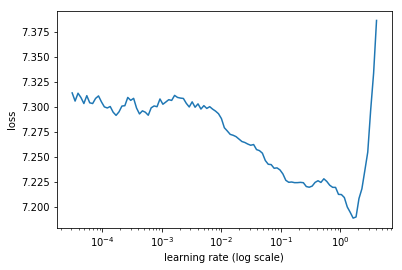

In [32]:
learner.sched.plot()

In [ ]:
learner.metrics = ['accuracy']

In [34]:
learner.fit(0.5,1)

A Jupyter Widget

epoch      trn_loss   val_loss   accuracy                   
    0      6.834539   6.722301   0.003024  



[6.7223005, 0.0030241935483870967]

In [ ]:
learner.